## Keras를 이용한 logistic regression

Epoch 1/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4995
Epoch 2/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5339
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5339
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5339
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5339
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.5339
Epoch 7/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.5339
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.5339
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.5339
Epoch 10/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.5339
Epoch 11/200
8/8 [===========

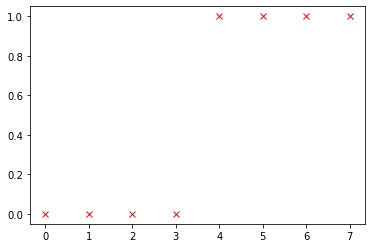

In [1]:
from keras.models import Sequential # 케라스의 Sequential()을 임포트
from keras.layers import Dense      # 케라스의 Dense()를 임포트
from keras import optimizers        # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트
import matplotlib.pyplot as plt
import math

X=np.array([0,1,2,3,4,5,6,7]) 
Y=np.array([0,0,0,0,1,1,1,1]) 

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
RMSprop=optimizers.RMSprop(lr=0.01)
model.compile(optimizer=RMSprop ,loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,Y, batch_size=1, epochs=200, shuffle=False)

plt.plot(X, Y, 'rx')
print(X)
print(model.predict(X))
plt.show()

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 악성종양
5 : 악성종양
6 : 악성종양
7 : 악성종양
8 : 악성종양
10 : 악성종양


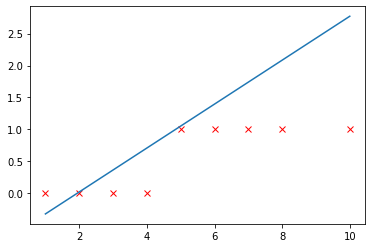

In [25]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    #활성화함수
    def activation(self, z):
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=100):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                y_hat = self.activation(y_hat)
                err = y_hat - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.01*w_grad          # 가중치 업데이트
                self.b -= 0.01*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,10])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

y_temp = []
for x_i in x:
    y_hat = neuron.forpass(x_i)
    if( y_hat >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(y_hat)

plt.plot(x,y_temp)
plt.show()

In [15]:
import numpy as np

# 1은 포함하지 않는다. [ )
probs = np.arange(0, 1, 0.01)

print(probs.ndim)
print(probs.shape)
print(probs)

1
(100,)
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


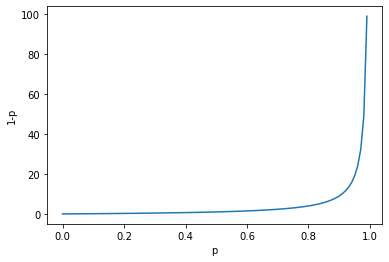

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
probs = np.arange(0, 1, 0.01)

odds = [p/(1-p) for p in probs]

plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('1-p')
plt.show()

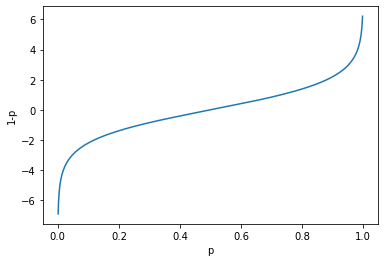

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
probs = np.arange(0.001, 0.999, 0.001)

odds = [np.log(p/(1-p)) for p in probs]

plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('1-p')
plt.show()

### 시그모이드 그래프

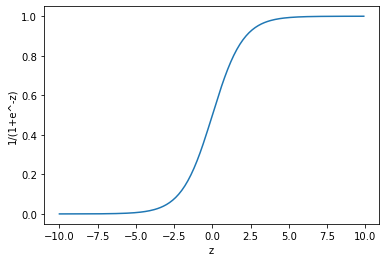

In [21]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 악성종양
6 : 악성종양
7 : 악성종양
8 : 악성종양
20 : 악성종양


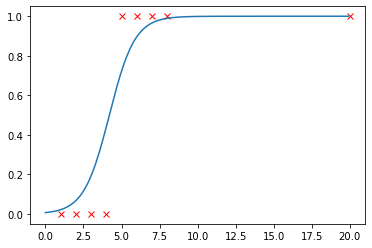

In [32]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        z = x * self.w + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    #활성화함수는 layer는 아니다.
    def activation(self, z):
#         a = z;
        a = 1/(1+np.exp(-z))
        return a

    # def geterr(self, err, y):
    #     if y
    #     return errv

    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z)
                #k = self.activation(yi)
                #err = a - k       # 오차 계산
                err = a - y_i       # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.01*w_grad          # 가중치 업데이트
                self.b -= 0.01*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,20])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y, epochs=1000)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

for x_i in x:
    y_hat = neuron.forpass(x_i)
    # 활성화함수를 적용한 값을 구한다.
    a = neuron.activation(y_hat)
    # 활성화함수를 적용한 값을 기준으로... 구분한다.
    if( a >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(a)

x = np.arange(0,x[-1],0.1)
y_temp = []
  
for i, x_i in enumerate(x):
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    y_temp.append(a)    
    
plt.plot(x,y_temp)
plt.show()

### 로그 그래프

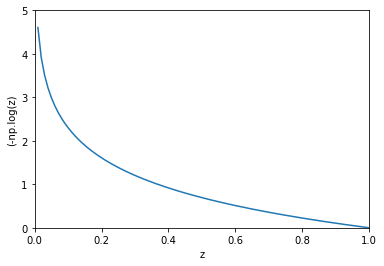

In [33]:

zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.show()

<ipython-input-34-f9b7ab8d5399>:2: RuntimeWarning: divide by zero encountered in log
  gs = [-np.log(1-z) for z in zs]
<ipython-input-34-f9b7ab8d5399>:2: RuntimeWarning: invalid value encountered in log
  gs = [-np.log(1-z) for z in zs]


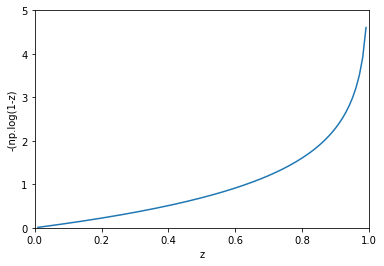

In [34]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(1-z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('-(np.log(1-z)')
plt.show()

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 악성종양
6 : 악성종양
7 : 악성종양
8 : 악성종양
20 : 악성종양


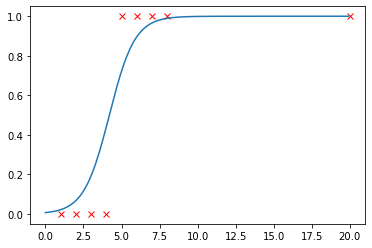

In [35]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        z = x * self.w + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
#         a = z;
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z)
                err = a - y_i       # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.01*w_grad          # 가중치 업데이트
                self.b -= 0.01*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,20])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y, epochs=1000)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

for x_i in x:
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    if( a >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(a)

x = np.arange(0,x[-1],0.1)
y_temp = []
  
for i, x_i in enumerate(x):
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    y_temp.append(a)    
    
plt.plot(x,y_temp)
plt.show()

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)
print(cancer)

(569, 30) (569,)
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [38]:
x = cancer.data
print(x.shape)
y = cancer.target
print(y.ndim)

(569, 30)
1


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
np.unique(y_train, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

In [52]:
a = np.arange(4).reshape(2,2)
print(len(a))
a = np.arange(4)#.reshape((2,2))
b = np.arange(4)#.reshape((2,2))
print(len(a))
print(a.shape)
c = np.sum(a*b)+1
print(c)
c = b*3 # broadcasting을 해준다? 
print(c)

2
4
(4,)
15
[0 3 6 9]


In [64]:
class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        # np.sum(x * self.w) = 각 요소별 (인덱스에 맞춰) 곱하고 더한다ㅣ
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        # python numpy 의 log나 exp의 값을 안전하게 만들기 위해서... clip을 사용.
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=300, lr=0.1):
        # np.ones(x) : x만큼 1로 채워진 배열을 만듬.
        
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        self.b = 0                        # 절편을 초기화합니다.
#         print(x.shape[1])
        for i in range(epochs):           # epochs만큼 반복합니다
            # x_i 는 1차원 배열 (x가 2차원 배열이라면..)
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i)     # 정방향 계산
                a = self.activation(z)    # 활성화 함수 적용
                err = (a - y_i)          # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= lr*w_grad          # 가중치 업데이트
                self.b -= lr*b_grad          # 절편 업데이트
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a >= 0.5

In [65]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)
print(neuron.predict(x_test))
print(neuron.predict(x_test)== y_test)

np.mean(neuron.predict(x_test) == y_test)

[False  True False False False False  True False False False  True False
  True False False False False  True  True  True False False  True  True
  True False False  True  True  True  True  True  True  True False  True
  True  True False False  True  True  True False False False  True  True
  True False  True False  True False  True  True  True False False  True
  True  True  True  True False False False  True False  True  True  True
  True False False False  True  True  True  True False  True False  True
 False  True  True  True False  True  True  True False False False  True
 False  True False False False False  True  True False False  True False
  True False  True False  True  True]
[ True  True  True False  True False  True  True  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True False  True  True
  True  True 

0.8596491228070176

### 단일층 신경망

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,
                                                    test_size=0.2, random_state=42)


class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100, lr=1):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            # stochastic 성질을 반영.
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                # err <- 기울기(가중치)를 구하기 위한 손실의 편미분값을 구하기 위한 값.
                err = a - y[i]                     # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= lr*w_grad                   # 가중치 업데이트
                self.b -= lr*b_grad                   # 절편 업데이트

                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용

    def score(self, x, y):
        return np.mean(self.predict(x) == y)


layer = SingleLayer()
layer.fit(x_train, y_train, 1000)
layer.score(x_test, y_test)


0.9122807017543859

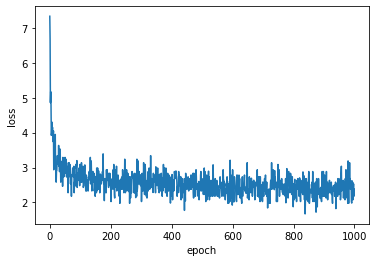

In [70]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

['mean perimeter' 'mean area']


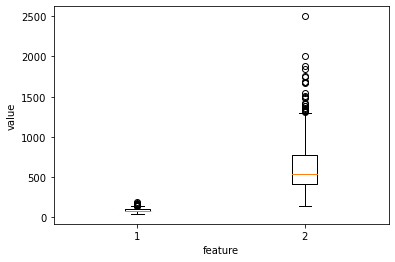

In [68]:
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [77]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([1,2,3,4,5,6,7,8,9])
indexes = np.random.permutation(np.arange(len(x)))
print(indexes)
print(type(x))
print(type(indexes))
#print(x[y])
print(x[indexes]) # x[[2, 3, ....]]

[3 2 5 0 8 1 6 4 7]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[4 3 6 1 9 2 7 5 8]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,
                                                    test_size=0.2, random_state=42)


class SingleLayer:

    def __init__(self, rand_flag):
        self.w = None
        self.b = None
        self.losses = []
        self.rand_flag = rand_flag

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100, lr=1):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            # stochastic 성질을 반영.

            if self.rand_flag == 1 :
                indexes = np.random.permutation(np.arange(len(x)))
            else :
                indexes = np.arange(len(x))

            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                # err <- 기울기(가중치)를 구하기 위한 손실의 편미분값을 구하기 위한 값.
                err = a - y[i]                     # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= lr*w_grad                   # 가중치 업데이트
                self.b -= lr*b_grad                   # 절편 업데이트

                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용

    def score(self, x, y):
        return np.mean(self.predict(x) == y)


layer1 = SingleLayer(rand_flag=0)
layer1.fit(x_train, y_train, 1000)
print(layer1.score(x_test, y_test))

layer2 = SingleLayer(rand_flag=1)
layer2.fit(x_train, y_train, 1000)
print(layer2.score(x_test, y_test))

0.8947368421052632


0.9385964912280702

In [5]:

a = np.array([[1,2,3],
              [4,5,6]])
print(a.shape)
print(np.sum(a))
print(np.sum(a, axis=0)) # 행끼리 더하라.  , 세로로 더하라
print(np.sum(a, axis=1)) # 열끼리 더하라.  , 가로로 더하라

a = np.array([[1,2,3],
              [4,5,6]])
print(a.shape)
print(np.sum(a))
print(np.sum(a, axis=0)) # 행끼리 더하라.  , 세로로 더하라
print(np.sum(a, axis=1)) # 열끼리 더하라.  , 가로로 더하라

(2, 3)
21
[5 7 9]
[ 6 15]
(2, 3)
21
[5 7 9]
[ 6 15]


In [11]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)
print(len(x_train), len(x_val), len(x_test))

mean_val = np.mean(x_val, axis=0)
std_val = np.std(x_val, axis=0)
print(mean_val)
print(std_val)
scaled_val = (x_val - mean_val) / std_val
print(scaled_val)

364 91 114
[1.41614396e+01 1.96972527e+01 9.17518681e+01 6.55262637e+02
 9.41680220e-02 9.32209890e-02 7.57663374e-02 4.38025165e-02
 1.78148352e-01 6.12267033e-02 3.99875824e-01 1.31148132e+00
 2.73276813e+00 3.82542198e+01 7.14908791e-03 2.22201978e-02
 2.73243703e-02 1.05569560e-02 1.98113407e-02 3.45895604e-03
 1.61994505e+01 2.63136264e+01 1.05910220e+02 8.64473626e+02
 1.30596923e-01 2.27545824e-01 2.46511516e-01 1.06028462e-01
 2.84825275e-01 8.11942857e-02]
[3.42288204e+00 4.16245544e+00 2.33685542e+01 3.29876154e+02
 1.33387049e-02 4.92794740e-02 7.43688561e-02 3.70839599e-02
 2.83366433e-02 6.44361428e-03 2.46979246e-01 6.45382025e-01
 1.68576702e+00 3.40395622e+01 3.15406405e-03 1.64423875e-02
 2.25926325e-02 5.23367224e-03 7.78016605e-03 2.40509164e-03
 4.49105352e+00 5.47712596e+00 3.04818672e+01 4.98673186e+02
 2.19006649e-02 1.40303978e-01 1.91968740e-01 6.45226161e-02
 6.34555042e-02 1.79580525e-02]
[[-0.8651889   2.323808   -0.90214687 ... -1.64327592 -2.02071162
  -1.

In [12]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b    # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err          # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())       # 가중치를 기록합니다.
        np.random.seed(42)                         # 랜덤 시드를 지정합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다.
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                # 그래디언트에서 페널티 항의 미분 값을 더합니다
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad         # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 가중치를 기록합니다.
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y) + self.reg_loss())
            # 손실을 저장할때마다...
            # 검증 세트에 대한 손실을 계산합니다
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) >= 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])     # 정방향 계산
            a = self.activation(z)         # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

0.9120879120879121
[]


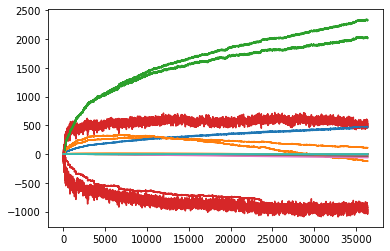

In [17]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
print(layer1.score(x_val, y_val))
print(layer1.val_losses)
plt.plot(layer1.w_history)
plt.show()

In [23]:
train_mean = np.mean(x_train, axis=0)
train_std  = np.std(x_train, axis=0)
train_scaled = (x_train-train_mean)/train_std

layer2 = SingleLayer()
layer2.fit(train_scaled, y_train)

In [20]:
layer2.score(x_val, y_val)

0.37362637362637363

In [32]:
val_mean = np.mean(x_val, axis=0)
val_std  = np.std(x_val, axis=0)
val_scaled = (x_val-train_mean)/train_std

layer2.score(val_scaled, y_val)

0.967032967032967

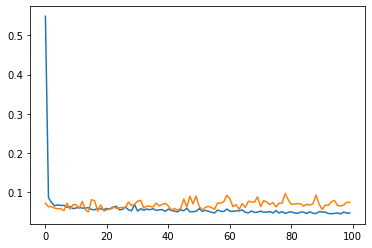

In [28]:
layer3 = SingleLayer()
layer3.fit(train_scaled, y_train, x_val=val_scaled, y_val=y_val)

plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.show()

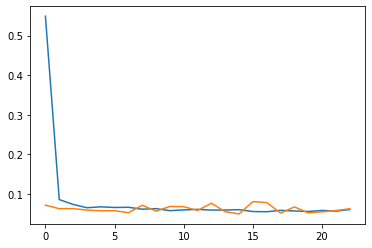

0.978021978021978


In [31]:
layer4 = SingleLayer()
layer4.fit(train_scaled, y_train, epochs=23, x_val=val_scaled, y_val=y_val)

plt.plot(layer4.losses)
plt.plot(layer4.val_losses)
plt.show()

print(layer4.score(val_scaled, y_val))

In [35]:
test_scaled = (x_test-train_mean)/train_std
print(layer4.score(test_scaled, y_test))
print(layer2.score(test_scaled, y_test))

0.9912280701754386
0.9824561403508771


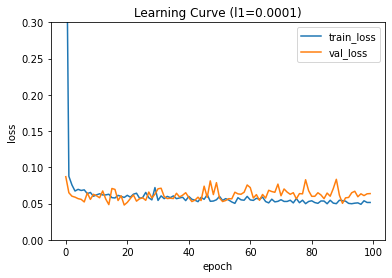

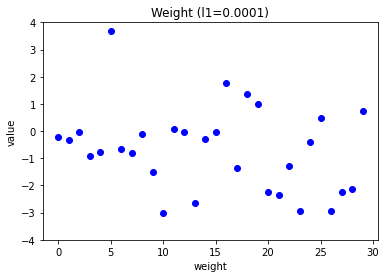

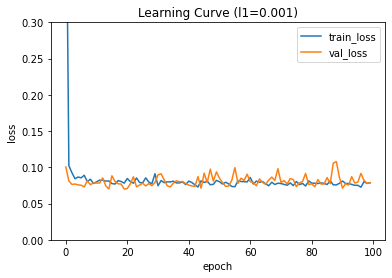

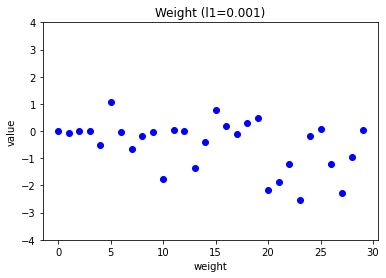

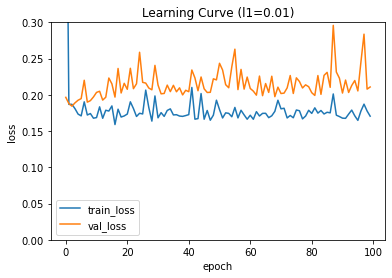

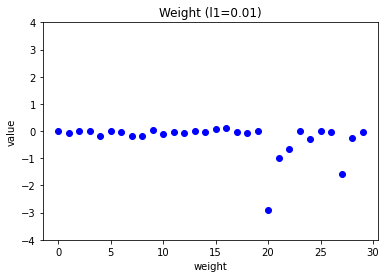

In [37]:

l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
    lyr = SingleLayer(l1=l1)
    lyr.fit(train_scaled, y_train, x_val=val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

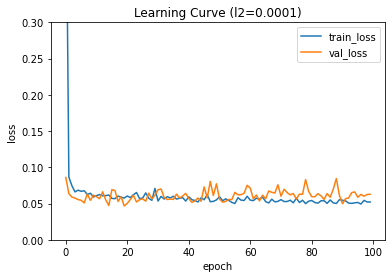

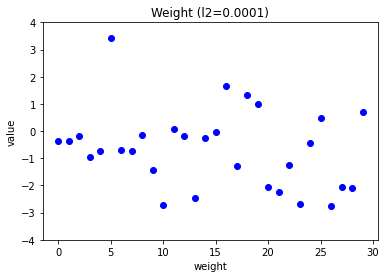

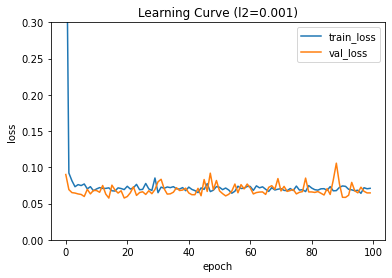

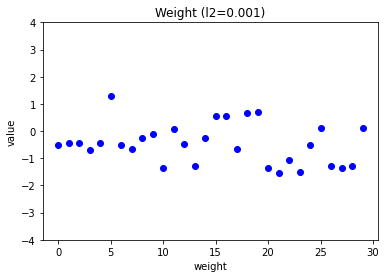

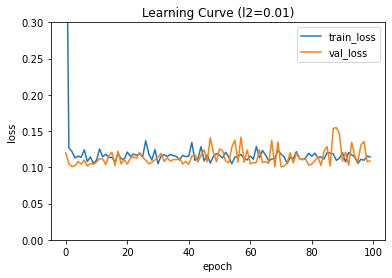

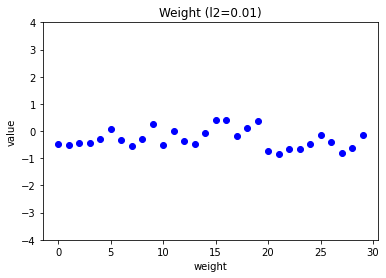

In [38]:

l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
    lyr = SingleLayer(l2=l2)
    lyr.fit(train_scaled, y_train, x_val=val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

In [49]:
a = np.arange(100)
val = a[90:100]
print(type(val))
val2 = list(val)
print(type(val2))
val3 = a[val2]
#val3 = val2[:]
print(type(val3))
print(len(val3))
print(val3)

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
10
[90 91 92 93 94 95 96 97 98 99]
